In [150]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pickle

In [151]:
df=pd.read_csv("gold-dataset-sinha-khandait.csv")

In [152]:
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [153]:
df.shape

(10570, 10)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [155]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [156]:
df['Price Sentiment'].value_counts()

positive    4412
negative    3814
none        1968
neutral      376
Name: Price Sentiment, dtype: int64

In [157]:
df['Price Sentiment'].unique()

array(['negative', 'positive', 'none', 'neutral'], dtype=object)

positive    4412
negative    3814
none        1968
neutral      376
Name: Price Sentiment, dtype: int64

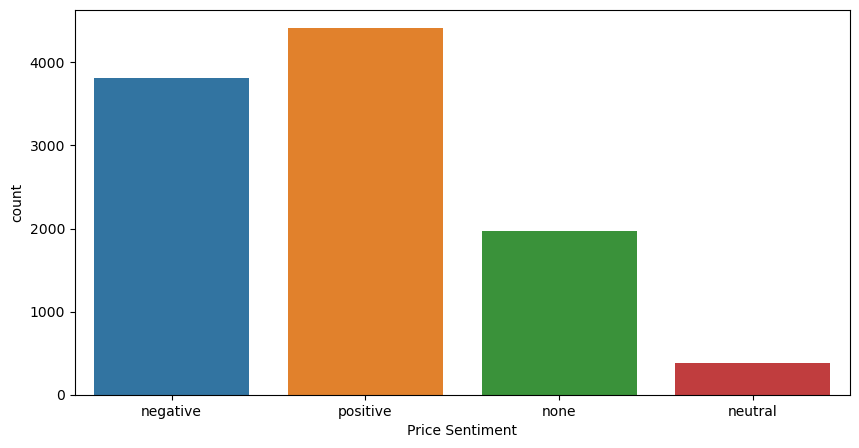

In [158]:
plt.figure(figsize=(10,5))
sns.countplot(x='Price Sentiment',data=df)
df['Price Sentiment'].value_counts()

DESCRIPTIVE STATISTICAL

In [159]:
df.describe(include='all')

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
count,10570,10570,10570,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000,10570
unique,3761,10570,10570,NaN,NaN,NaN,NaN,NaN,NaN,4
top,30-08-2017,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,18,1,1,NaN,NaN,NaN,NaN,NaN,NaN,4412
mean,NaN,NaN,NaN,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018,NaN
std,NaN,NaN,NaN,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,NaN
75%,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,NaN


positive    4412
negative    3814
none        1968
neutral      376
Name: Price Sentiment, dtype: int64

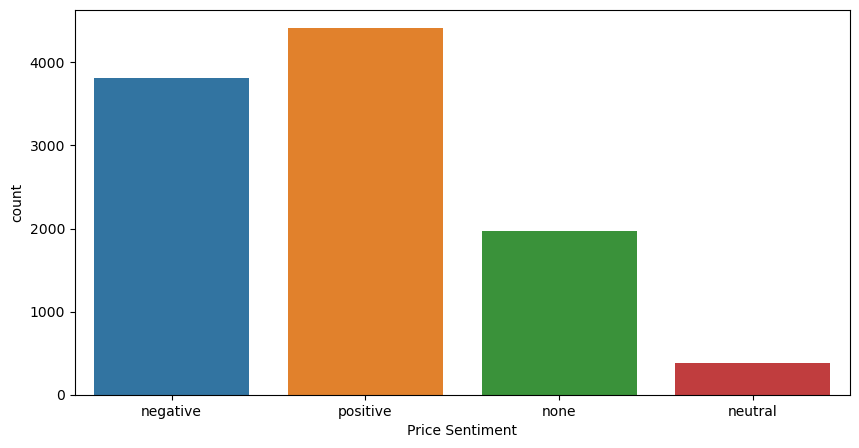

In [160]:
plt.figure(figsize=(10,5))
sns.countplot(x='Price Sentiment',data=df)
df['Price Sentiment'].value_counts()

<Axes: xlabel='Price Sentiment', ylabel='count'>

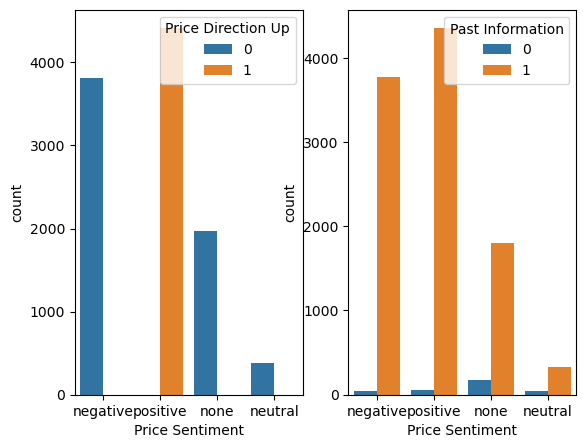

In [161]:
plt.figure(figsize=(10,5))
plt.subplot(131)
sns.countplot(x='Price Sentiment',hue='Price Direction Up',data=df)
plt.subplot(132)
sns.countplot(x= 'Price Sentiment',hue= 'Past Information',data=df)

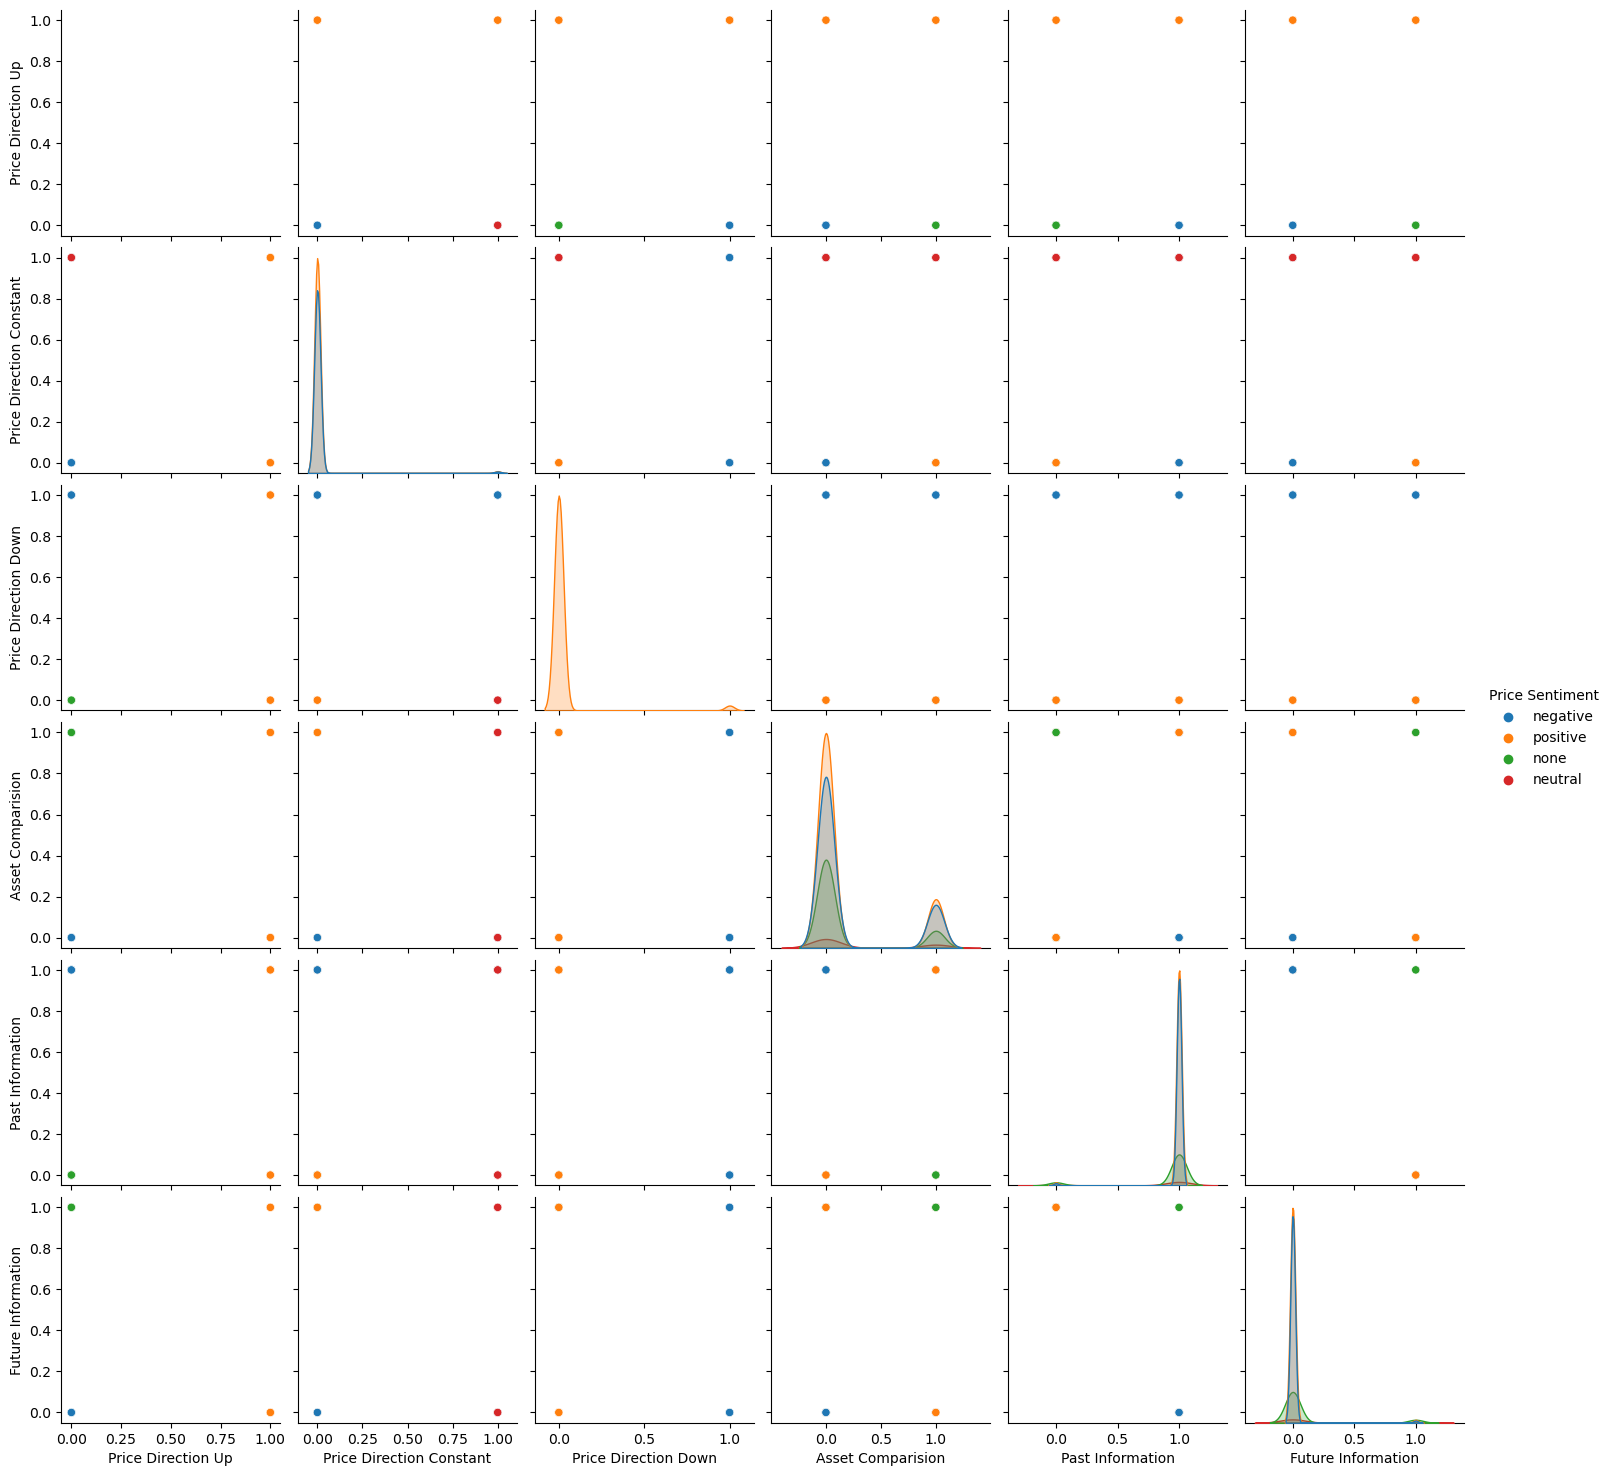

In [162]:
sns.pairplot(df,hue='Price Sentiment')

In [163]:
import re
import string

def text_clean_1(text): 
    text = text.lower() #converts to lower-case or upper case
    text = re.sub('\[.*?\]', '', text) #it will remove .,?,"", []
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)    # #it will remove "",.
    text = re.sub('\w*\d\w*','',text)
    text = re.sub('[''""...]','',text) #it eill remove''',''','''',and'...'.
    text = re.sub('\n','',text)
    return text

Cleaned_News = lambda x: text_clean_1(x) 

In [164]:
df['Cleaned_News']=pd.DataFrame(df.News.apply(Cleaned_News))
df.head(10)

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment,Cleaned_News
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative,april gold down cents to settle at
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative,gold suffers third straight daily decline
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive,gold futures edge up after twosession decline
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none,dent research is golds day in the sun coming ...
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative,gold snaps threeday rally as trump lawmakers r...
5,16-08-2016,http://www.marketwatch.com/story/dec-gold-clim...,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",1,0,0,0,1,0,positive,dec gold climbs or to settle at
6,24-09-2013,https://economictimes.indiatimes.com/markets/c...,"gold falls by rs 25 on sluggish demand, global...",0,0,1,0,1,0,negative,gold falls by rs on sluggish demand global cues
7,23-09-2016,http://www.marketwatch.com/story/gold-futures-...,"Gold futures fall for the session, but gain fo...",1,0,1,0,1,0,positive,gold futures fall for the session but gain for...
8,21-10-2012,https://www.thehindubusinessline.com/opinion/c...,"Gold struggles; silver slides, base metals falter",0,1,0,1,1,0,neutral,gold struggles silver slides base metals falter
9,16-03-2018,http://www.marketwatch.com/story/april-gold-ho...,"april gold holds slight gain, up $2.50, or 0.2...",1,0,0,0,1,0,positive,april gold holds slight gain up or at


In [213]:
from sklearn.model_selection import train_test_split

x = df['Cleaned_News']
y = df['Price Sentiment']

x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)
print("x_train:",len(x_train))
print("x_test:", len(x_test))
print("y_train:",len(y_train))
print("y_test: ", len(y_test))


x_train: 8456
x_test: 2114
y_train: 8456
y_test:  2114


In [214]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()
clf2 = LogisticRegression()




In [216]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test)
pred_train=model.predict(x_train)
confusion_matrix(predictions,y_test)

C:\Users\vivin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[701,  15,  26,  29],
       [  1,  50,   1,   2],
       [ 31,   9, 330,  48],
       [ 36,  15,  34, 786]], dtype=int64)

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svm=SVC(kernel='linear')
tvec = TfidfVectorizer()

In [219]:

model2 = Pipeline([('vectorizer',tvec),('classifier',svm)])
model2.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
predictions2 = model.predict(x_test)
pred2_train=model.predict(x_train)
confusion_matrix(predictions2,y_test)

array([[701,  15,  26,  29],
       [  1,  50,   1,   2],
       [ 31,   9, 330,  48],
       [ 36,  15,  34, 786]], dtype=int64)

In [220]:
example = ["gold to trade in 28670-29160 range: achiievers equities"]
result = model.predict(example)
print(result)




['neutral']


In [221]:
example = ["gold to trade in 28670-29160 range: achiievers equities"]
result = model2.predict(example)
print(result)

['neutral']


In [222]:
 example = ["can investment in gold, sensex & ppfs give the same returns?"]
result = model.predict(example)
print(result)

['none']


In [223]:
example = ["can investment in gold, sensex & ppfs give the same returns?"] 
result = model2.predict(example) 
print(result)

['none']


In [224]:
from sklearn.metrics import classification_report

#assume y train and pred train are your true and predicted Labels, respectively
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.91      0.91      0.91       769
     neutral       0.93      0.56      0.70        89
        none       0.79      0.84      0.82       391
    positive       0.90      0.91      0.91       865

    accuracy                           0.88      2114
   macro avg       0.88      0.81      0.83      2114
weighted avg       0.88      0.88      0.88      2114



In [226]:


#assume y train and pred2 train are your true and predicted Labels, respectively 
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

    negative       0.91      0.91      0.91       769
     neutral       0.93      0.56      0.70        89
        none       0.79      0.84      0.82       391
    positive       0.90      0.91      0.91       865

    accuracy                           0.88      2114
   macro avg       0.88      0.81      0.83      2114
weighted avg       0.88      0.88      0.88      2114



In [232]:
example = ["gold to trade in 28670-29160 range: achiievers equities"] 
result = model.predict(example)

print(result)

['neutral']


In [234]:
example = ["gold to trade in 28670-29160 range: achiievers equities"] 
result = model2.predict(example)

print(result)

['neutral']


In [235]:
example = ["can investment in gold, sensex & ppfs give the same returns?"] 
result = model.predict(example)

print(result)

['none']


In [237]:
example = ["can investment in gold, sensex & ppfs give the same returns?"] 
result= model2.predict(example)
print(result)

['none']


In [238]:
from sklearn.metrics import accuracy_score

print("Accuracy_test : ", accuracy_score (predictions, y_test))

print("Accuracy train : ", accuracy_score(pred_train, y_train))

Accuracy_test :  0.8831598864711447
Accuracy train :  0.9331835383159887


In [240]:
print("Accuracy_test: ", accuracy_score(predictions2, y_test)) 
print("Accuracy_train: ", accuracy_score(pred2_train, y_train))

Accuracy_test:  0.8831598864711447
Accuracy_train:  0.9331835383159887


In [242]:
import pickle
pickle.dump(model,open('goldnewsanalysis.pkl','wb'))